In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols  # Ordinary Least Squares (OLS) model

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

## VQA

In [224]:
vilbert = {0 : 68.90, 1234 : 68.71, 27 : 68.85, 33 : 68.97, 42 : 68.75, 54 : 68.83, 69 : 68.73, 73 : 68.77, 89 : 68.69, 93 : 68.90}
lxmert = {0 : 67.52, 1234 : 67.52, 27 : 67.73, 33 : 67.50, 42 : 67.08, 54 : 67.40, 69 : 67.66, 73 : 67.64, 89 : 67.46, 93 : 67.51}
vlbert = {0 : 68.04, 1234 : 68.16, 27 : 68.72, 33 : 68.29, 42 : 68.33, 54 : 68.37, 69 : 68.24, 73 : 67.97, 89 : 68.23, 93 : 67.96}
visualbert = {0 : 68.66, 1234 : 69.03, 27 : 68.65, 33 : 68.53, 42 : 68.20, 54 : 68.85, 69 : 68.77, 73 : 68.59, 89 : 68.55, 93 : 68.66}
uniter = {0 : 68.70, 1234 : 68.38, 27 : 68.92, 33 : 68.30, 42 : 68.84, 54 : 68.22, 69 : 68.14, 73 : 68.67, 89 : 68.80, 93 : 68.73}

# Create a dataframe
scores = list(vilbert.values()) + list(vlbert.values()) + list(visualbert.values()) + list(uniter.values())
models = ['vilbert']*10 + ['vl-bert']*10 + ['visualbert']*10 + ['uniter']*10
groups = ['Dual']*10 + ['Single']*30
df = pd.DataFrame({'Scores': scores, 'Model': models, 'Group': groups, 'Subject': list(range(40))})
df = df.drop('Subject', axis=1)

df.head()

,Scores,Model,Group
0,68.90,vilbert,Dual
1,68.71,vilbert,Dual
2,68.85,vilbert,Dual
3,68.97,vilbert,Dual
4,68.75,vilbert,Dual


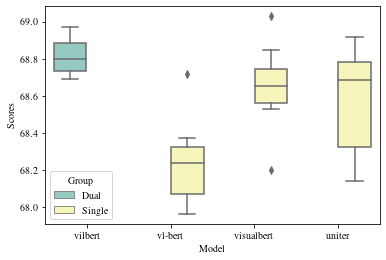

In [225]:
sns.boxplot(x="Model", y="Scores", hue="Group", data=df, palette="Set3") 

In [232]:
# V&L BERTs
model = ols('Scores ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Model),1.78662,3.0,12.751097,0.000008
Residual,1.68138,36.0,NaN,NaN


In [234]:
# Single/Dual Stream
model = ols('Scores ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),0.800333,1.0,11.400475,0.001705
Residual,2.667667,38.0,NaN,NaN


## RefCOCO

In [139]:
vilbert = {0 : 70.84, 1234 : 70.57, 27 : 70.95, 33 : 70.53, 42 : 71.41, 54 : 71.31, 69 : 70.87, 73 : 71.11, 89 : 71.07, 93 : 70.81}
lxmert = {0 : 70.49, 1234 : 70.40, 27 : 69.91, 33 : 70.14, 42 : 68.84, 54 : 69.81, 69 : 69.84, 73 : 70.20, 89 : 69.83, 93 : 70.04}
vlbert = {0 : 71.39, 1234 : 71.16, 27 : 71.46, 33 : 71.20, 42 : 71.07, 54 : 71.15, 69 : 70.84, 73 : 70.82, 89 : 71.23, 93 : 71.23}
visualbert = {0 : 69.67, 1234 : 70.02, 27 : 70.01, 33 : 69.51, 42 : 69.68, 54 : 69.83, 69 : 69.90, 73 : 70.25, 89 : 69.54, 93 : 69.40}
uniter = {0 : 71.62, 1234 : 71.88, 27 : 71.49, 33 : 71.61, 42 : 71.95, 54 : 71.59, 69 : 71.63, 73 : 71.45, 89 : 71.80, 93 : 71.50}

# Create a dataframe
scores = list(vilbert.values()) + list(vlbert.values()) + list(visualbert.values()) + list(uniter.values())
models = ['vilbert']*10 + ['vl-bert']*10 + ['visualbert']*10 + ['uniter']*10
groups = ['Dual']*10 + ['Single']*30
df = pd.DataFrame({'Scores': scores, 'Model': models, 'Group': groups, 'Subject': list(range(40))})
df = df.drop('Subject', axis=1)

df.head()

,Scores,Model,Group
0,70.84,vilbert,Dual
1,70.57,vilbert,Dual
2,70.95,vilbert,Dual
3,70.53,vilbert,Dual
4,71.41,vilbert,Dual


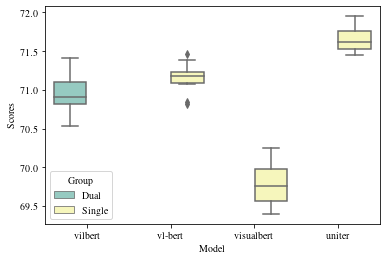

In [140]:
sns.boxplot(x="Model", y="Scores", hue="Group", data=df, palette="Set3") 

In [142]:
# V&L BERTs
model = ols('Scores ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Model),18.838427,3.0,111.607017,2.732179e-18
Residual,2.025510,36.0,NaN,NaN


In [143]:
# Single/Dual Stream
model = ols('Scores ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),0.053341,1.0,0.0974,0.756678
Residual,20.810597,38.0,NaN,NaN


## NLVR2

In [145]:
vilbert = {0 : 71.87, 1234 : 71.91, 27 : 71.51, 33 : 72.24, 42 : 72.38, 54 : 72.57, 69 : 71.60, 73 : 71.93, 89 : 72.71, 93 : 71.72}
lxmert = {0 : 71.09, 1234 : 70.76, 27 : 68.87, 33 : 69.40, 42 : 69.07, 54 : 69.51, 69 : 69.69, 73 : 69.26, 89 : 69.64, 93 : 70.19}
vlbert = {0 : 72.31, 1234 : 72.57, 27 : 72.90, 33 : 73.19, 42 : 72.61, 54 : 73.20, 69 : 73.37, 73 : 73.04, 89 : 73.22, 93 : 72.66}
visualbert = {0 : 71.82, 1234 : 72.70, 27 : 72.61, 33 : 71.22, 42 : 71.34, 54 : 71.25, 69 : 72.03, 73 : 72.27, 89 : 72.87, 93 : 72.67}
uniter = {0 : 72.05, 1234 : 73.26, 27 : 73.36, 33 : 73.49, 42 : 72.94, 54 : 74.16, 69 : 72.57, 73 : 73.73, 89 : 73.30, 93 : 73.39}

# Create a dataframe
scores = list(vilbert.values()) + list(vlbert.values()) + list(visualbert.values()) + list(uniter.values())
models = ['vilbert']*10 + ['vl-bert']*10 + ['visualbert']*10 + ['uniter']*10
groups = ['Dual']*10 + ['Single']*30
df = pd.DataFrame({'Scores': scores, 'Model': models, 'Group': groups, 'Subject': list(range(40))})
df = df.drop('Subject', axis=1)

df.head()

,Scores,Model,Group
0,71.87,vilbert,Dual
1,71.91,vilbert,Dual
2,71.51,vilbert,Dual
3,72.24,vilbert,Dual
4,72.38,vilbert,Dual


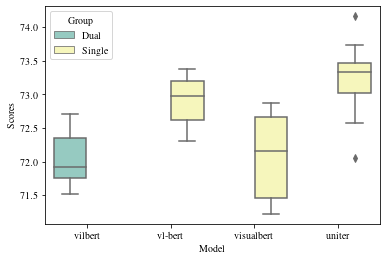

In [146]:
sns.boxplot(x="Model", y="Scores", hue="Group", data=df, palette="Set3") 

In [148]:
# V&L BERTs
model = ols('Scores ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Model),10.61165,3.0,13.407492,0.000005
Residual,9.49766,36.0,NaN,NaN


In [149]:
# Single/Dual Stream
model = ols('Scores ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),3.598403,1.0,8.281758,0.006537
Residual,16.510907,38.0,NaN,NaN


## Flickr IR

In [151]:
vilbert = {0 : 59.60, 1234 : 59.62, 27 : 60.94, 33 : 60.34, 42 : 59.82, 54 : 59.30, 69 : 61.24, 73 : 60.44, 89 : 60.78, 93 : 59.52}
lxmert = {0 : 58.62, 1234 : 57.76, 27 : 55.36, 33 : 55.60, 42 : 50.36, 54 : 58.20, 69 : 55.92, 73 : 56.52, 89 : 56.64, 93 : 57.84}
vlbert = {0 : 54.72, 1234 : 54.40, 27 : 57.26, 33 : 56.76, 42 : 57.92, 54 : 56.94, 69 : 55.14, 73 : 56.68, 89 : 57.62, 93 : 56.12}
visualbert = {0 : 58.04, 1234 : 61.48, 27 : 58.98, 33 : 57.06, 42 : 61.06, 54 : 58.32, 69 : 58.90, 73 : 60.68, 89 : 58.16, 93 : 54.06}
uniter = {0 : 60.74, 1234 : 58.26, 27 : 59.10, 33 : 58.72, 42 : 60.92, 54 : 57.88, 69 : 57.76, 73 : 60.54, 89 : 59.68, 93 : 59.94}

# Create a dataframe
scores = list(vilbert.values()) + list(vlbert.values()) + list(visualbert.values()) + list(uniter.values())
models = ['vilbert']*10 + ['vl-bert']*10 + ['visualbert']*10 + ['uniter']*10
groups = ['Dual']*10 + ['Single']*30
df = pd.DataFrame({'Scores': scores, 'Model': models, 'Group': groups, 'Subject': list(range(40))})
df = df.drop('Subject', axis=1)

df.head()

,Scores,Model,Group
0,59.60,vilbert,Dual
1,59.62,vilbert,Dual
2,60.94,vilbert,Dual
3,60.34,vilbert,Dual
4,59.82,vilbert,Dual


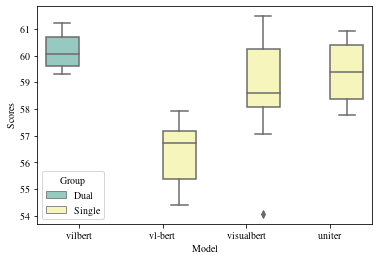

In [152]:
sns.boxplot(x="Model", y="Scores", hue="Group", data=df, palette="Set3") 

In [154]:
# V&L BERTs
model = ols('Scores ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Model),80.37944,3.0,13.272271,0.000005
Residual,72.67432,36.0,NaN,NaN


In [155]:
# Single/Dual Stream
model = ols('Scores ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),30.96768,1.0,9.63887,0.00359
Residual,122.08608,38.0,NaN,NaN


## Flickr TR

In [157]:
vilbert = {0 : 75.00, 1234 : 75.80, 27 : 76.90, 33 : 78.80, 42 : 76.70, 54 : 75.50, 69 : 77.30, 73 : 77.10, 89 : 76.50, 93 : 76.70}
lxmert = {0 : 74.90, 1234 : 72.90, 27 : 71.30, 33 : 71.60, 42 : 62.50, 54 : 73.70, 69 : 70.10, 73 : 72.30, 89 : 72.20, 93 : 73.50}
vlbert = {0 : 67.50, 1234 : 69.20, 27 : 70.80, 33 : 70.40, 42 : 68.50, 54 : 69.80, 69 : 71.30, 73 : 71.00, 89 : 70.90, 93 : 70.70}
visualbert = {0 : 74.80, 1234 : 75.20, 27 : 71.50, 33 : 72.50, 42 : 75.50, 54 : 74.00, 69 : 72.80, 73 : 75.60, 89 : 71.30, 93 : 68.50}
uniter = {0 : 75.30, 1234 : 72.50, 27 : 73.20, 33 : 72.10, 42 : 74.20, 54 : 72.60, 69 : 72.90, 73 : 76.40, 89 : 73.50, 93 : 74.90}

# Create a dataframe
scores = list(vilbert.values()) + list(vlbert.values()) + list(visualbert.values()) + list(uniter.values())
models = ['vilbert']*10 + ['vl-bert']*10 + ['visualbert']*10 + ['uniter']*10
groups = ['Dual']*10 + ['Single']*30
df = pd.DataFrame({'Scores': scores, 'Model': models, 'Group': groups, 'Subject': list(range(40))})
df = df.drop('Subject', axis=1)

df.head()

,Scores,Model,Group
0,75.0,vilbert,Dual
1,75.8,vilbert,Dual
2,76.9,vilbert,Dual
3,78.8,vilbert,Dual
4,76.7,vilbert,Dual


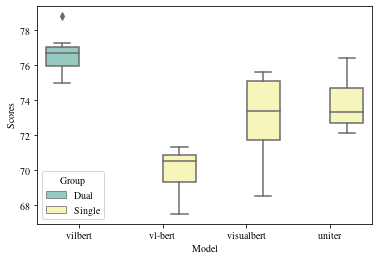

In [158]:
sns.boxplot(x="Model", y="Scores", hue="Group", data=df, palette="Set3") 

In [160]:
# V&L BERTs
model = ols('Scores ~ C(Model)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Model),221.07275,3.0,29.742396,7.495249e-10
Residual,89.19500,36.0,NaN,NaN


In [161]:
# Single/Dual Stream
model = ols('Scores ~ C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),139.752083,1.0,31.14423,0.000002
Residual,170.515667,38.0,NaN,NaN
